In [52]:
%matplotlib inline
import pandas as pd
import sys
import numpy as np
from __future__ import division
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.learning_curve import validation_curve
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import StratifiedKFold
from scipy import interp

In [2]:
applicants = pd.read_csv("https://www.dropbox.com/s/s168am9a1iknwi8/applicants_transformed.csv?dl=1")

In [67]:
applicants["Total_Sales"] = applicants["Total_Sales"].astype('int')
applicants.info()
applicants.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5903 entries, 0 to 5902
Data columns (total 42 columns):
Unnamed: 0            5903 non-null int64
License_Number        5903 non-null int64
X                     5903 non-null int64
City                  5903 non-null object
City.1                5171 non-null object
County                5893 non-null object
DateCreated           5150 non-null float64
DayPhone              5899 non-null float64
Email                 5806 non-null object
License.              5903 non-null int64
Mail.Suite.Rm         5171 non-null object
MailAddress           5903 non-null object
MailCity              732 non-null object
MailState             732 non-null object
MailSuite.Rm          732 non-null object
MailZipCode           732 non-null float64
NightPhone            5883 non-null float64
OwnerName             5893 non-null object
PrivDesc              5903 non-null object
PrivilegeStatus       5903 non-null object
ReasonAction          5903 non-null o

,Unnamed: 0,License_Number,X,City,City.1,County,DateCreated,DayPhone,Email,License.,...,type:producer,type:retailer,Group.1,Total_Sales,Excise_Tax_Due,tax_rate,violation_count,violator,log_Total_Sales,log_Excise_Tax_Due
0,1,51124,89,TACOMA,NaN,PIERCE,NaN,2532928175,WORKCOURTNEY@GMAIL.COM,51124,...,0,0,NaN,0,0,0,0,False,-inf,-inf
1,2,59974,2035,SHELTON,SHELTON,MASON,20150903,3604905012,david.walterick@gmail.com,59974,...,1,0,NaN,0,0,0,0,False,-inf,-inf
2,3,59974,1494,SHELTON,SHELTON,MASON,20150903,3604905012,david.walterick@gmail.com,59974,...,0,0,NaN,0,0,0,0,False,-inf,-inf
3,4,59978,1019,OROVILLE,SILVERLAKE,OKANOGAN,20150904,3609015985,urbanfarms@yahoo.com,59978,...,1,0,NaN,0,0,0,0,False,-inf,-inf
4,5,59978,725,OROVILLE,SILVERLAKE,OKANOGAN,20150904,3609015985,urbanfarms@yahoo.com,59978,...,0,0,NaN,0,0,0,0,False,-inf,-inf


In [73]:
features = applicants[["Total_Sales", "Excise_Tax_Due", "tax_rate"]] # some logarithms are infinity due to negative original value?
labels = applicants["violator"]

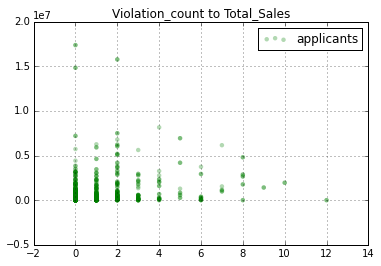

In [35]:
plt.scatter(applicants["violation_count"], applicants["Total_Sales"], c='green', label='applicants',
            alpha=0.3, edgecolors='none')

plt.title('Violation_count to Total_Sales')
plt.legend()
plt.grid(True)

plt.show()


In [74]:
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.3) 


DecisionTreeClassifier accuracy :  0.961038961039


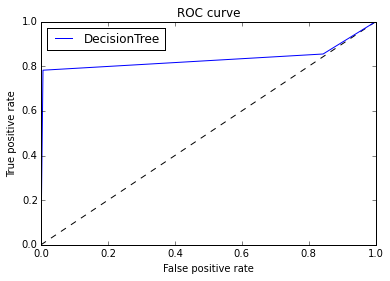

In [103]:
clf = tree.DecisionTreeClassifier(max_depth=None)
clf.fit(features_train, labels_train) 
pred = clf.predict(features_test)
print "DecisionTreeClassifier accuracy : " , accuracy_score(pred, labels_test)

X = features
y = labels

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

# The model by itself
y_pred = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DecisionTree')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

RandomForestClassifier accuracy :  0.961038961039


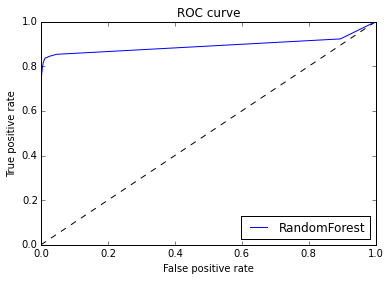

In [102]:
clf = RandomForestClassifier()
clf.fit(features_train, labels_train) 
pred = clf.predict(features_test)
print "RandomForestClassifier accuracy : ", accuracy_score(pred, labels_test)

X = features
y = labels

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

# The model by itself
y_pred = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RandomForest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

ExtraTreesClassifier accuracy :  0.96442687747


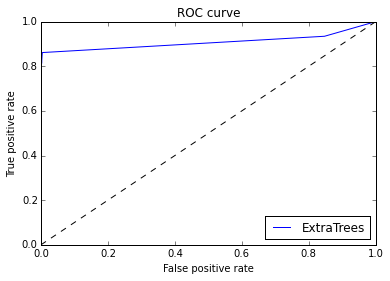

In [100]:
clf = ExtraTreesClassifier()
clf.fit(features_train, labels_train) 
pred = clf.predict(features_test)
print "ExtraTreesClassifier accuracy : ", accuracy_score(pred, labels_test)

X = features
y = labels

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

# The model by itself
y_pred = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ExtraTrees')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

AdaBoostClassifier accuracy :  0.939582156973


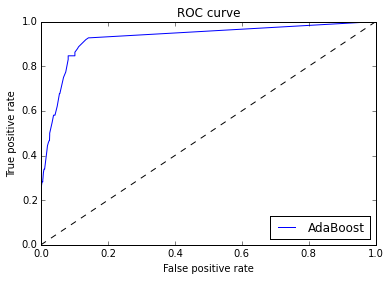

In [99]:
clf = AdaBoostClassifier()
clf.fit(features_train, labels_train) 
pred = clf.predict(features_test)
print "AdaBoostClassifier accuracy : ", accuracy_score(pred, labels_test)

X = features
y = labels

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

# The model by itself
y_pred = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AdaBoost')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

GaussianNB accuracy :  0.934500282326


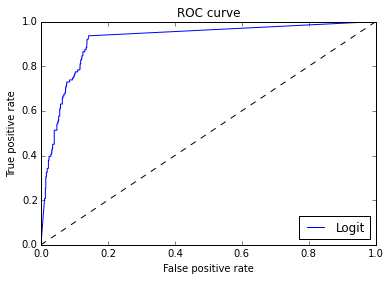

In [98]:
clf = GaussianNB()
clf.fit(features_train, labels_train) 
pred = clf.predict(features_test)
print "GaussianNB accuracy : ", accuracy_score(pred, labels_test)

X = features
y = labels

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

# The model by itself
y_pred = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

LogisticRegression accuracy :  0.935629587804


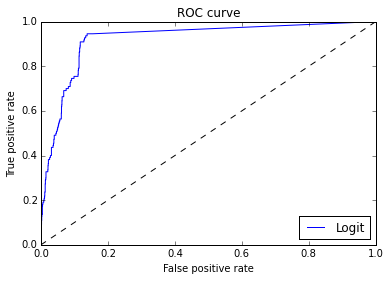

In [97]:
clf = linear_model.LogisticRegression()
clf.fit(features_train, labels_train) 
pred = clf.predict(features_test)
print "LogisticRegression accuracy : ", accuracy_score(pred, labels_test)

X = features
y = labels

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

# The model by itself
y_pred = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logit')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
